# XOR Multi-Layer Perceptron

## Expalnation of the model

The purpose of the model is to get a more in-depth understanding of the mathematics behind a simple Multi-Layer Perceptron (MLP). I have used the non-linear sigmoid activation function:

$$\sigma(x)=\frac{1}{1+e^{-x}}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]).reshape(4, 2, 1)

Y = np.array([
    0,
    1,
    1,
    0
])

In [3]:
weights_l0 = np.random.rand(2, 2)
bias_l1 = np.random.rand(2, 1)
weights_l1 = np.random.rand(1, 2)
bias_l2 = np.random.rand(1, 1)

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [5]:
def feed_forward(x):
    z1 = np.dot(weights_l0, x) + bias_l1
    a1 = sigmoid(z1)
    
    z2 = np.dot(weights_l1, a1) + bias_l2
    y_hat = sigmoid(z2)

    return a1, y_hat

$L(\hat{y},y)=\frac{1}{2}(\hat{y}-y)^2$, therefore $\frac{\partial L}{\partial \hat{y}}=\hat{y}-y$, to simplify later backpropogation calculations.

$\sigma\prime(x)=\sigma(x)(1-\sigma(x))$, for ease of calculation, $y=\sigma(x)$, therefore $\sigma\prime(x)=y(1-y)$, as shown below

In [6]:
def L(y_hat, y):
    return 0.5 * (y_hat - y) ** 2

In [7]:
def sigmoid_derivative(y):
    return y * ( 1 - y )

## Maths behind the backpropogation algorithms

If $\hat{y}$ is the product of multiple functions within functions, the best way to derive each paramter is by using the chain rule, the whole chain rule, for $\frac{\partial L}{\partial w^{(0)}}$ expanded is shown below:

$$\frac{\partial L}{\partial W^{(0)}} = \frac{\partial L}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial z^{(2)}} \frac{\partial z^{(2)}}{\partial a^{(1)}} \frac{\partial a^{(1)}}{\partial z^{(1)}} \frac{\partial z^{(1)}}{\partial W^{(0)}}$$

$$\delta_2= \frac{\partial L}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial z^{(2)}}=(\hat{y}-y)\times \hat{y}(1-\hat{y})$$ 
$$\frac{\partial L}{\partial W^{(1)}} = \delta_2 \cdot a^{(1)}\top, \frac{\partial L}{\partial b^{(2)}}$$

In [8]:
def backprop(y_hat, y, w1, a1, xi):
    delta2 = (y_hat - y) * sigmoid_derivative(y_hat)
    dL_dw1, dL_db2 = delta2 @ a1.T, delta2
    delta1 = (w1.T @ delta2) * sigmoid_derivative(a1)
    dL_dw0, dL_db1 = delta1 @ xi.T, delta1
    return dL_dw0, dL_db1, dL_dw1, dL_db2

In [9]:
learning_rate = 1
epochs = 100000
losses = []

In [10]:
for i in tqdm(range(epochs)):
    loss = 0
    for i, x in enumerate(X):
        a1, y_hat = feed_forward(x)

        loss += L(y_hat, Y[i])

        dL_dw0, dL_db1, dL_dw1, dL_db2 = backprop(y_hat, Y[i], weights_l1, a1, x)
        weights_l0 -= learning_rate * dL_dw0
        weights_l1 -= learning_rate * dL_dw1
        bias_l1 -= learning_rate * dL_db1
        bias_l2 -= learning_rate * dL_db2

    losses.append(loss / 4)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:07<00:00, 13050.00it/s]


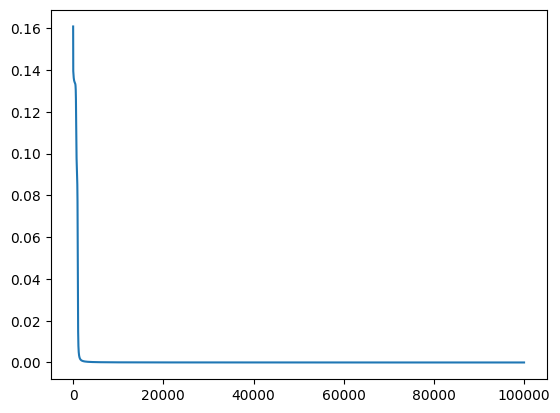

In [11]:
xn = [i for i in range(epochs)]
plt.plot(xn, np.array(losses).reshape(epochs))

In [12]:
def classifier(prediction):
    if prediction >= 0.5: return 1
    else: return 0

In [13]:
for i in range(4):
    _, p = feed_forward(X[i]) 
    print(f'Input A: {X[i][0][0]}, Input B: {X[i][1][0]}, Prediction: {p[0][0]}')

Input A: 0, Input B: 0, Prediction: 0.0032315807834421553
Input A: 0, Input B: 1, Prediction: 0.9966835992950991
Input A: 1, Input B: 0, Prediction: 0.9966790785465272
Input A: 1, Input B: 1, Prediction: 0.004052534107833253


In [14]:
example_num = 10000
point_A = np.random.rand(example_num).tolist()
point_B = np.random.rand(example_num).tolist()
coords = np.array(list(zip(point_A, point_B)))

In [15]:
pres = [0 for i in range(example_num)]
for i in range(example_num):
    _, p = feed_forward(coords[i].T.reshape(2, 1))
    pres[i] = classifier(p)

In [16]:
colors = ['red' if y == 0 else 'blue' for y in pres]

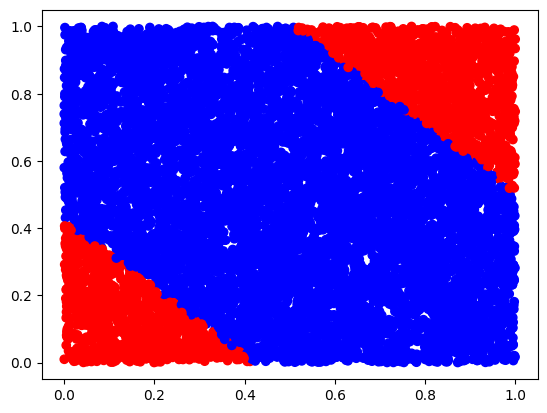

In [18]:
plt.scatter(point_A, point_B, color=colors)